In [95]:
from pandas import read_csv
from numpy import mean
from matplotlib.pyplot import show , xlabel , ylabel , plot , title , figure , legend
from tensorflow.keras import layers , models
from tensorflow.keras.metrics import mean_absolute_error , mean_squared_error
from tensorflow.data import Dataset

In [96]:
path = "D:\datasets\Turkey-Mugla\Milas.csv"
file = read_csv(path)
df = file.copy()
df.head(10)

,ID,Date,Location,Latitude,Longtitude,Magnitude,Depth,Record date
0,1,1/11/2005 10:42,MiLAS (MUGLA),37.3190,27.9532,3.2,23.1,01:52.4
1,2,1/24/2005 6:40,MILAS (MUGLA),37.2315,27.7882,3.3,19.4,01:52.4
2,3,2/10/2005 5:41,MiLAS (MUGLA),37.2935,27.9117,3.0,11.4,01:52.4
3,4,2/15/2005 3:35,MiLAS (MUGLA),37.2163,27.9430,3.0,7.3,01:52.4
4,5,2/16/2005 23:17,MiLAS (MUGLA),37.2242,27.8765,3.0,22.9,01:52.4
5,6,4/29/2005 9:24,MiLAS (MUGLA),37.4005,27.9158,2.8,10.4,01:52.6
6,7,5/16/2005 5:54,OREN-MiLAS (MUGLA),37.0737,28.0592,2.8,13.4,01:52.6
7,8,5/16/2005 8:11,OREN-MiLAS (MUGLA),37.0647,27.8480,3.1,23.7,01:52.6
8,9,5/21/2005 13:31,MiLAS (MUGLA),37.2398,27.9142,2.7,5.5,01:52.6
9,10,5/22/2005 2:52,GULLUK-MiLAS (MUGLA),37.1895,27.6838,2.7,56.2,01:52.6


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5947 entries, 0 to 5946
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5947 non-null   int64  
 1   Date         5947 non-null   object 
 2   Location     5947 non-null   object 
 3   Latitude     5947 non-null   float64
 4   Longtitude   5947 non-null   float64
 5   Magnitude    5947 non-null   float64
 6   Depth        5947 non-null   float64
 7   Record date  5947 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 371.8+ KB


# working on Magnitude column

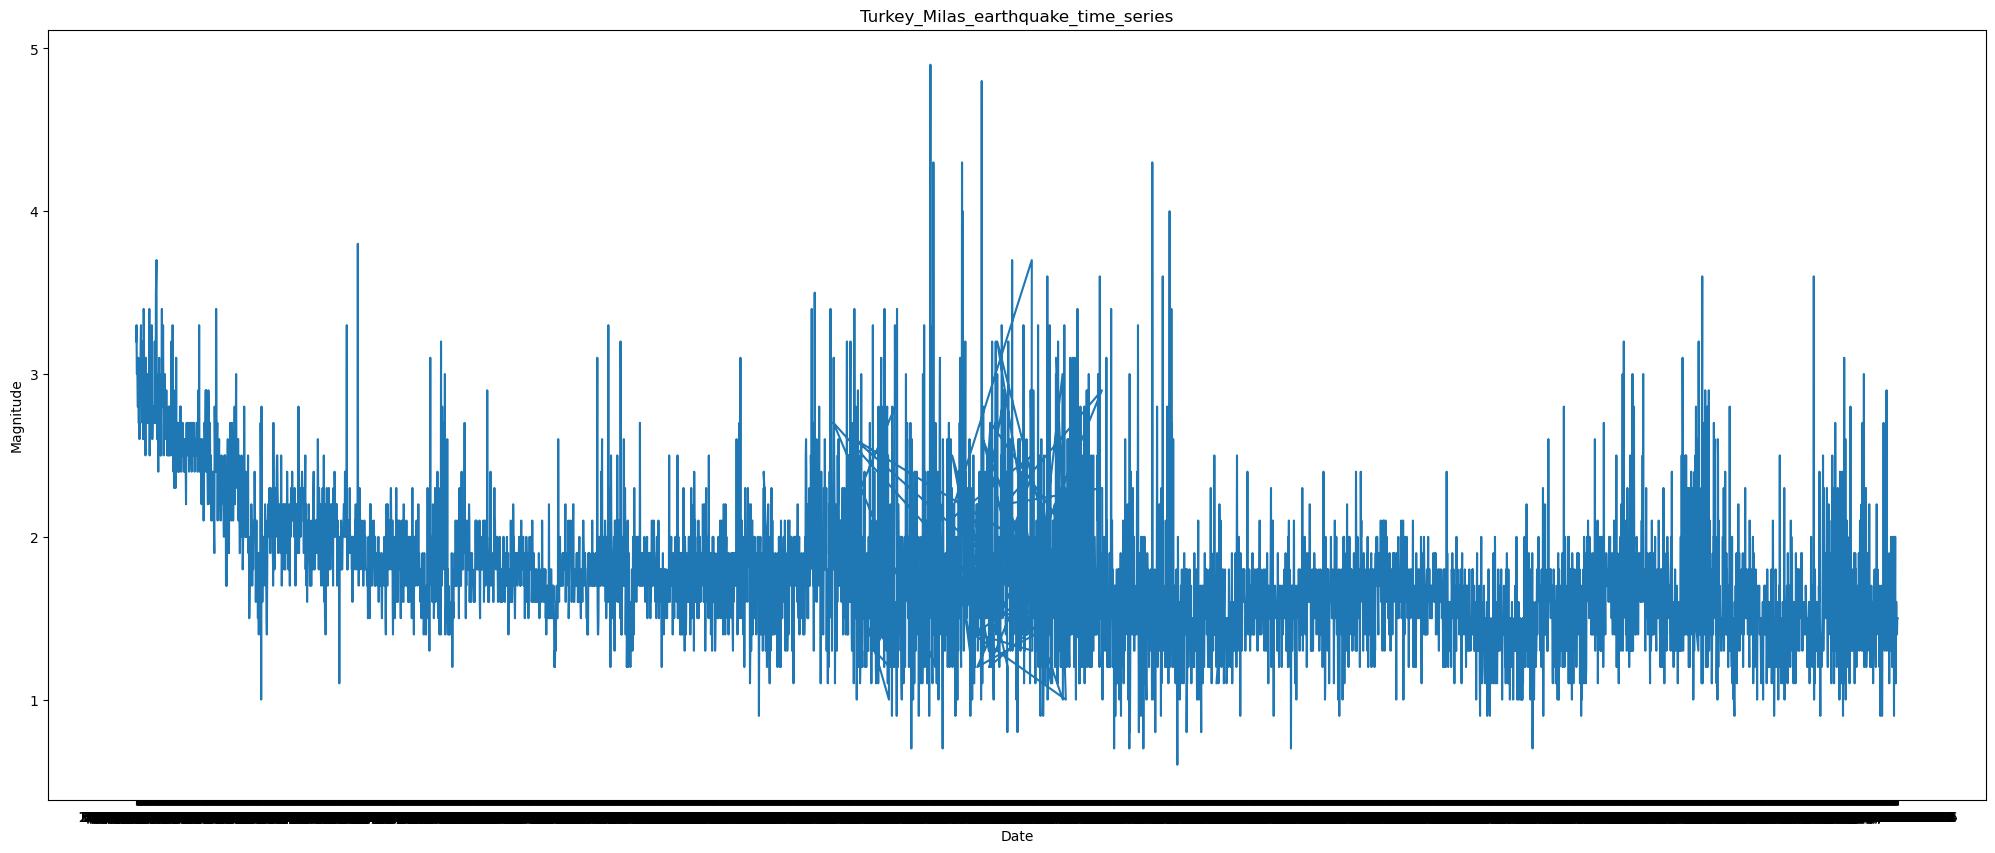

In [98]:
figure(figsize=(25,10))
plot(df.Date,df.Magnitude)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Milas_earthquake_time_series')
show()

In [99]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Magnitude.to_list()[:idx]
xts = df.Magnitude.to_list()[idx:]

Enter train size:75


In [100]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 4460
Test size: 1487


In [101]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [102]:
dataset_ts = Dataset.from_tensor_slices(df.Magnitude.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [103]:
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [104]:
history = Create_model().fit(dataset_tr,epochs=100)

Epoch 1/100
74/74 [==============================] - 1s 7ms/step - loss: 0.3883 - mae: 0.3767
Epoch 2/100
74/74 [==============================] - 1s 7ms/step - loss: 0.1589 - mae: 0.2754
Epoch 3/100
74/74 [==============================] - 0s 6ms/step - loss: 0.1540 - mae: 0.2755
Epoch 4/100
74/74 [==============================] - 0s 5ms/step - loss: 0.1528 - mae: 0.2705
Epoch 5/100
74/74 [==============================] - 0s 5ms/step - loss: 0.1520 - mae: 0.2692
Epoch 6/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1486 - mae: 0.2683
Epoch 7/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1501 - mae: 0.2676
Epoch 8/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1498 - mae: 0.2680
Epoch 9/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1490 - mae: 0.2667
Epoch 10/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1480 - mae: 0.2653
Epoch 11/100
74/74 [==============================] - 0s 4m

74/74 [==============================] - 0s 4ms/step - loss: 0.1228 - mae: 0.2464
Epoch 88/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1246 - mae: 0.2481
Epoch 89/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1233 - mae: 0.2461
Epoch 90/100
74/74 [==============================] - 0s 5ms/step - loss: 0.1250 - mae: 0.2499
Epoch 91/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1207 - mae: 0.2439
Epoch 92/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1208 - mae: 0.2433
Epoch 93/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1199 - mae: 0.2423
Epoch 94/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1203 - mae: 0.2428
Epoch 95/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1187 - mae: 0.2429
Epoch 96/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1207 - mae: 0.2436
Epoch 97/100
74/74 [==============================] - 0s 4ms/st

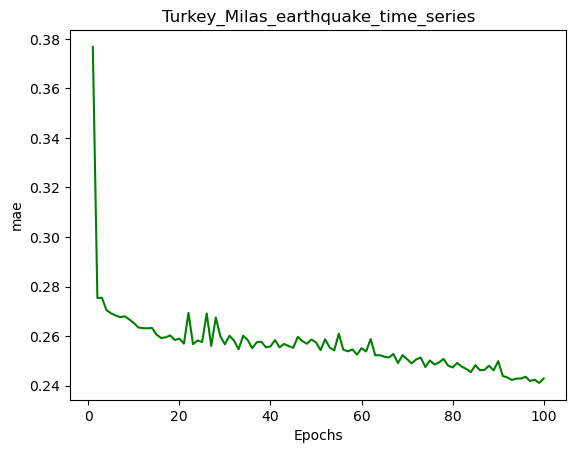

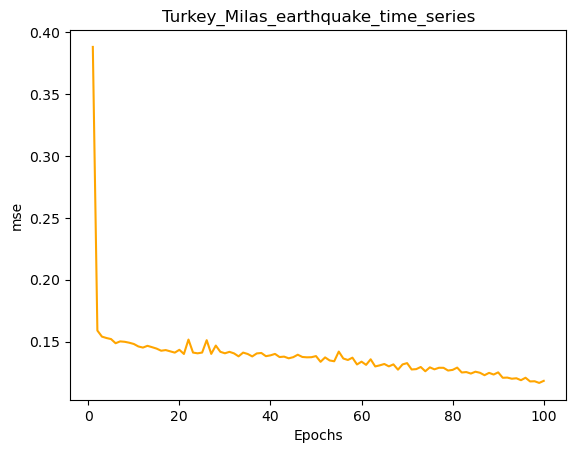

In [105]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Milas_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Milas_earthquake_time_series')
show()

In [125]:
preds_ts = Create_model().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

99/99 [==============================] - 0s 4ms/step
mse :  1 , mae :  1


In [126]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

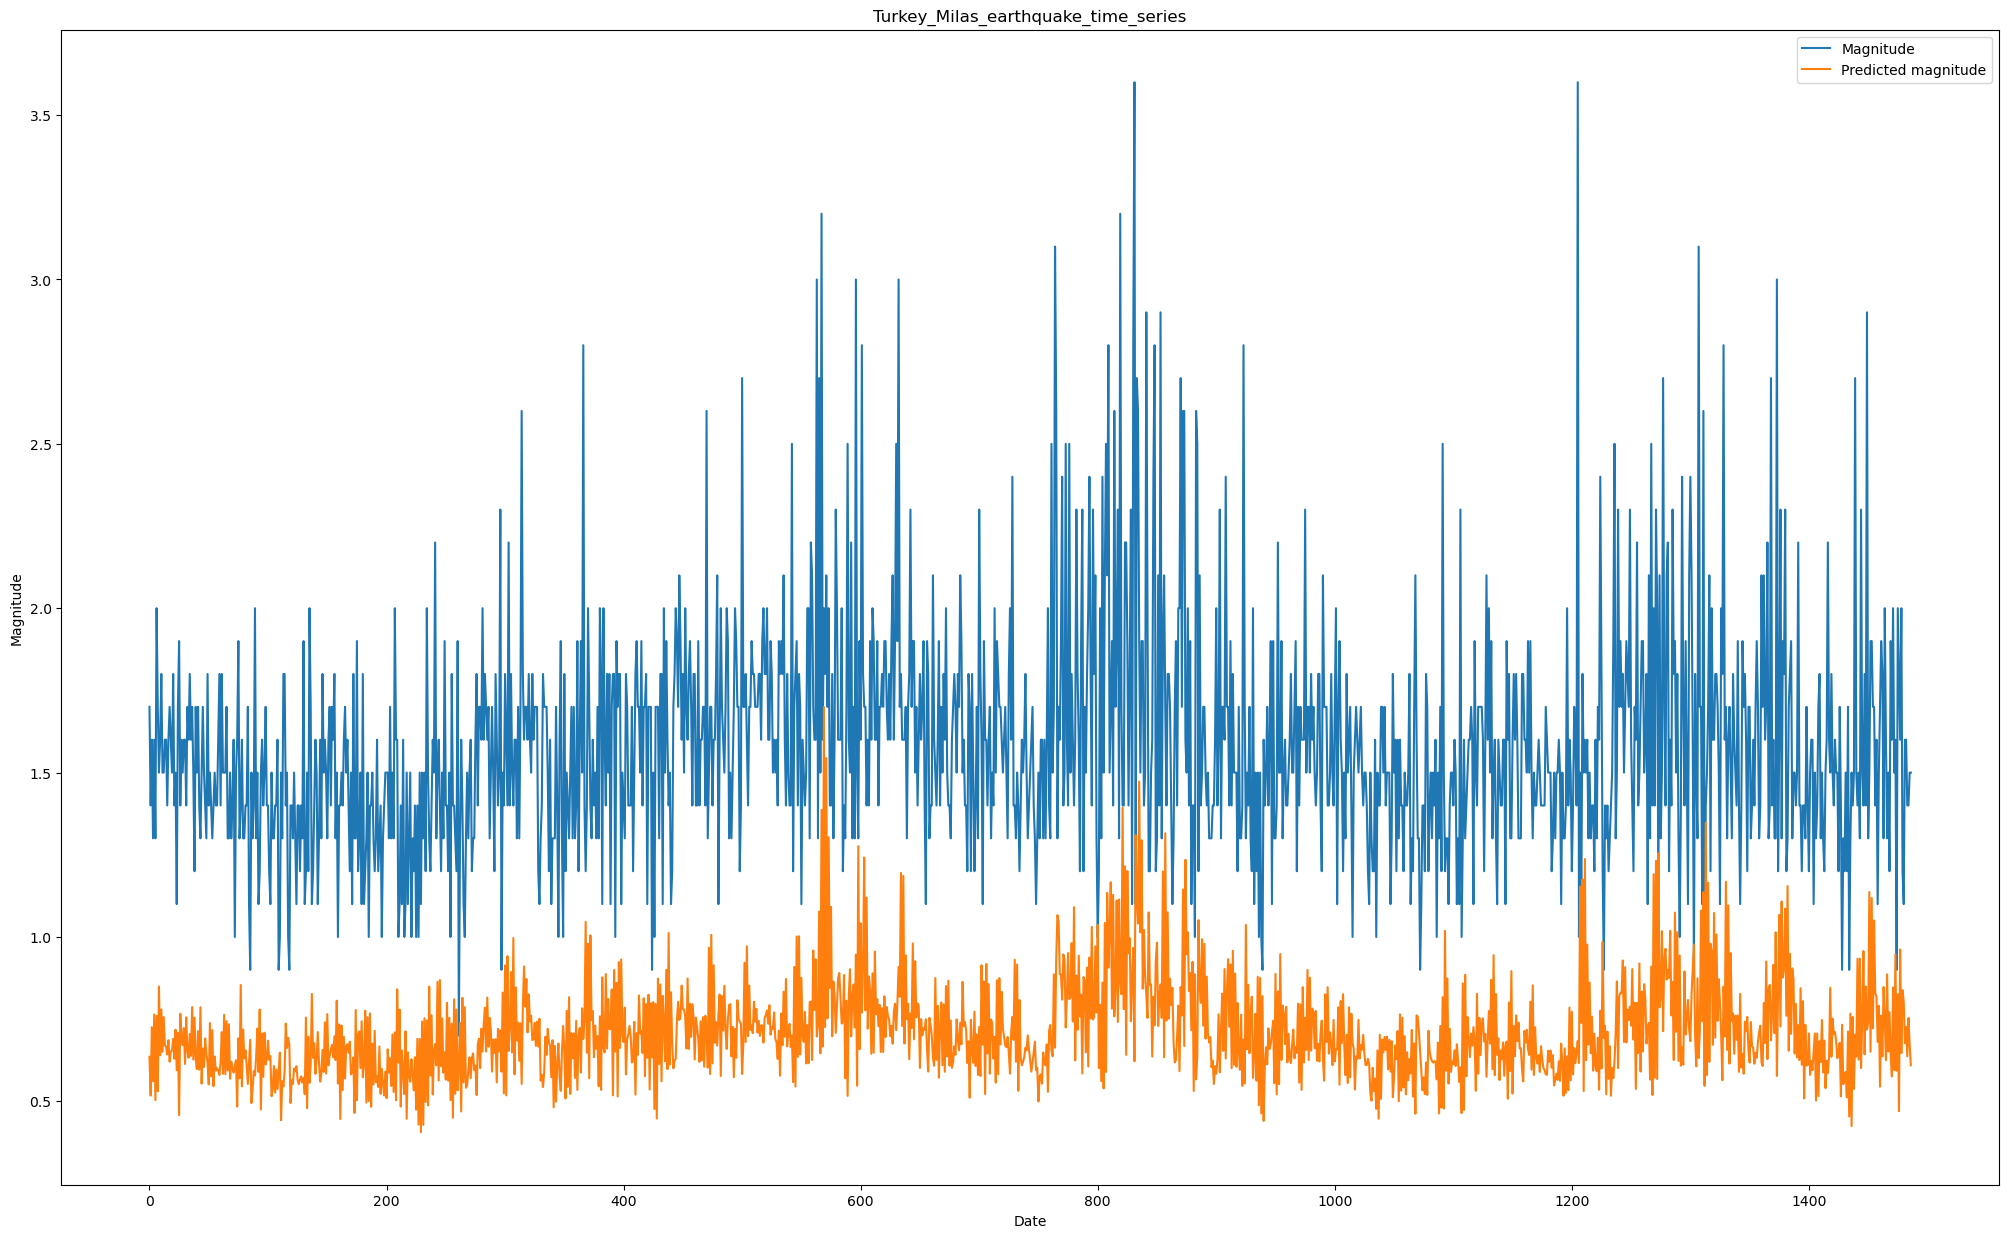

In [127]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Milas_earthquake_time_series')
xlabel('Date')
ylabel('Magnitude')
legend(['Magnitude','Predicted magnitude'])
show()

# working on Depth column

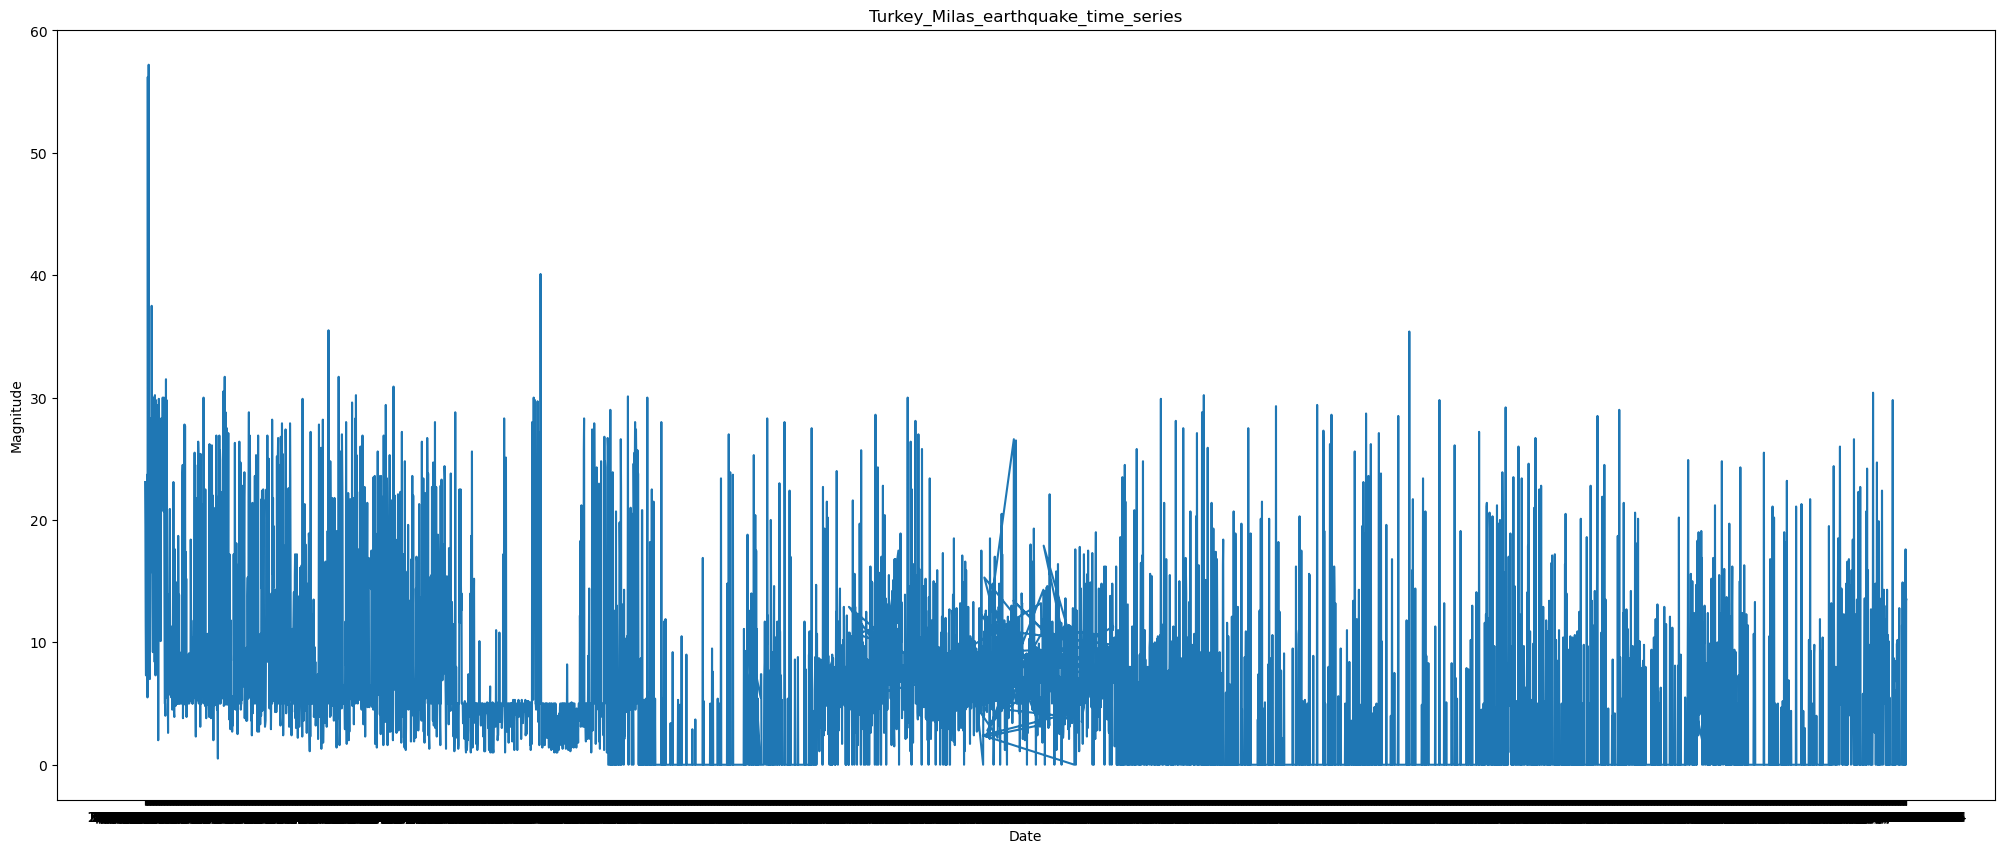

In [128]:
figure(figsize=(25,10))
plot(df.Date,df.Depth)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Milas_earthquake_time_series')
show()

In [129]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Depth.to_list()[:idx]
xts = df.Depth.to_list()[idx:]

Enter train size:80


In [130]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 4757
Test size: 1190


In [131]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [132]:
dataset_ts = Dataset.from_tensor_slices(df.Depth.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [133]:
def Create_model2()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu',return_sequences=True),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [134]:
history = Create_model2().fit(dataset_tr,epochs=100)

Epoch 1/100
79/79 [==============================] - 2s 8ms/step - loss: 48.2185 - mae: 4.6848
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 39.9162 - mae: 4.4591
Epoch 3/100
79/79 [==============================] - 1s 6ms/step - loss: 39.8773 - mae: 4.4579
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 38.8588 - mae: 4.4312
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 38.9224 - mae: 4.4329
Epoch 6/100
79/79 [==============================] - 1s 6ms/step - loss: 39.0226 - mae: 4.4207
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 38.5075 - mae: 4.4016
Epoch 8/100
79/79 [==============================] - 0s 6ms/step - loss: 38.3020 - mae: 4.4163
Epoch 9/100
79/79 [==============================] - 0s 6ms/step - loss: 38.4590 - mae: 4.4014
Epoch 10/100
79/79 [==============================] - 0s 5ms/step - loss: 38.2219 - mae: 4.3791
Epoch 11/100
79/79 [=============================

79/79 [==============================] - 0s 6ms/step - loss: 19.6731 - mae: 3.1869
Epoch 87/100
79/79 [==============================] - 0s 6ms/step - loss: 19.4906 - mae: 3.1593
Epoch 88/100
79/79 [==============================] - 0s 6ms/step - loss: 19.1543 - mae: 3.1259
Epoch 89/100
79/79 [==============================] - 0s 6ms/step - loss: 19.0366 - mae: 3.1321
Epoch 90/100
79/79 [==============================] - 0s 5ms/step - loss: 18.9905 - mae: 3.1072
Epoch 91/100
79/79 [==============================] - 0s 6ms/step - loss: 19.6923 - mae: 3.1622
Epoch 92/100
79/79 [==============================] - 0s 6ms/step - loss: 19.2073 - mae: 3.1291
Epoch 93/100
79/79 [==============================] - 0s 5ms/step - loss: 18.6744 - mae: 3.1047
Epoch 94/100
79/79 [==============================] - 0s 5ms/step - loss: 18.6244 - mae: 3.1038
Epoch 95/100
79/79 [==============================] - 0s 6ms/step - loss: 18.8150 - mae: 3.1262
Epoch 96/100
79/79 [==============================] -

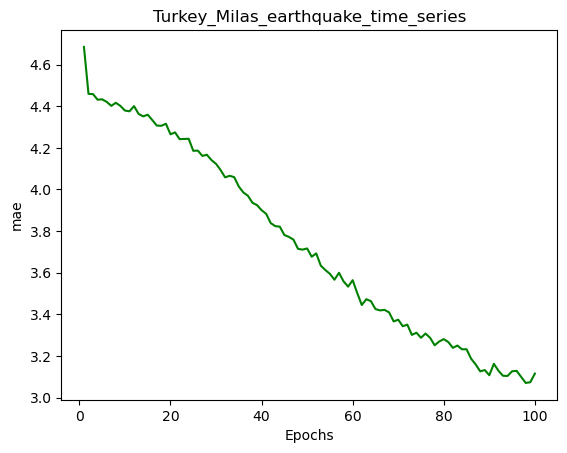

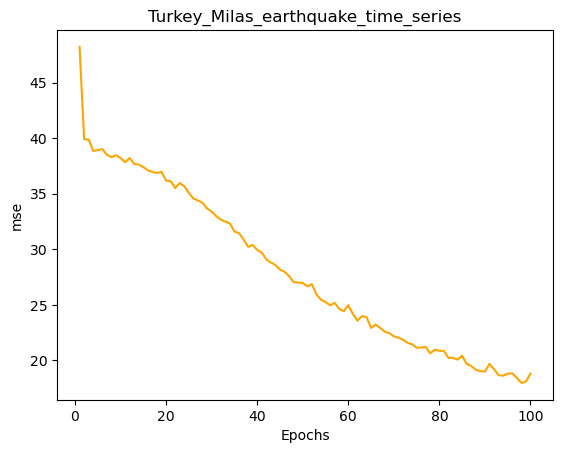

In [135]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Milas_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Milas_earthquake_time_series')
show()

In [136]:
preds_ts = Create_model2().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

99/99 [==============================] - 1s 4ms/step
mse : 43 , mae :  4


In [137]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

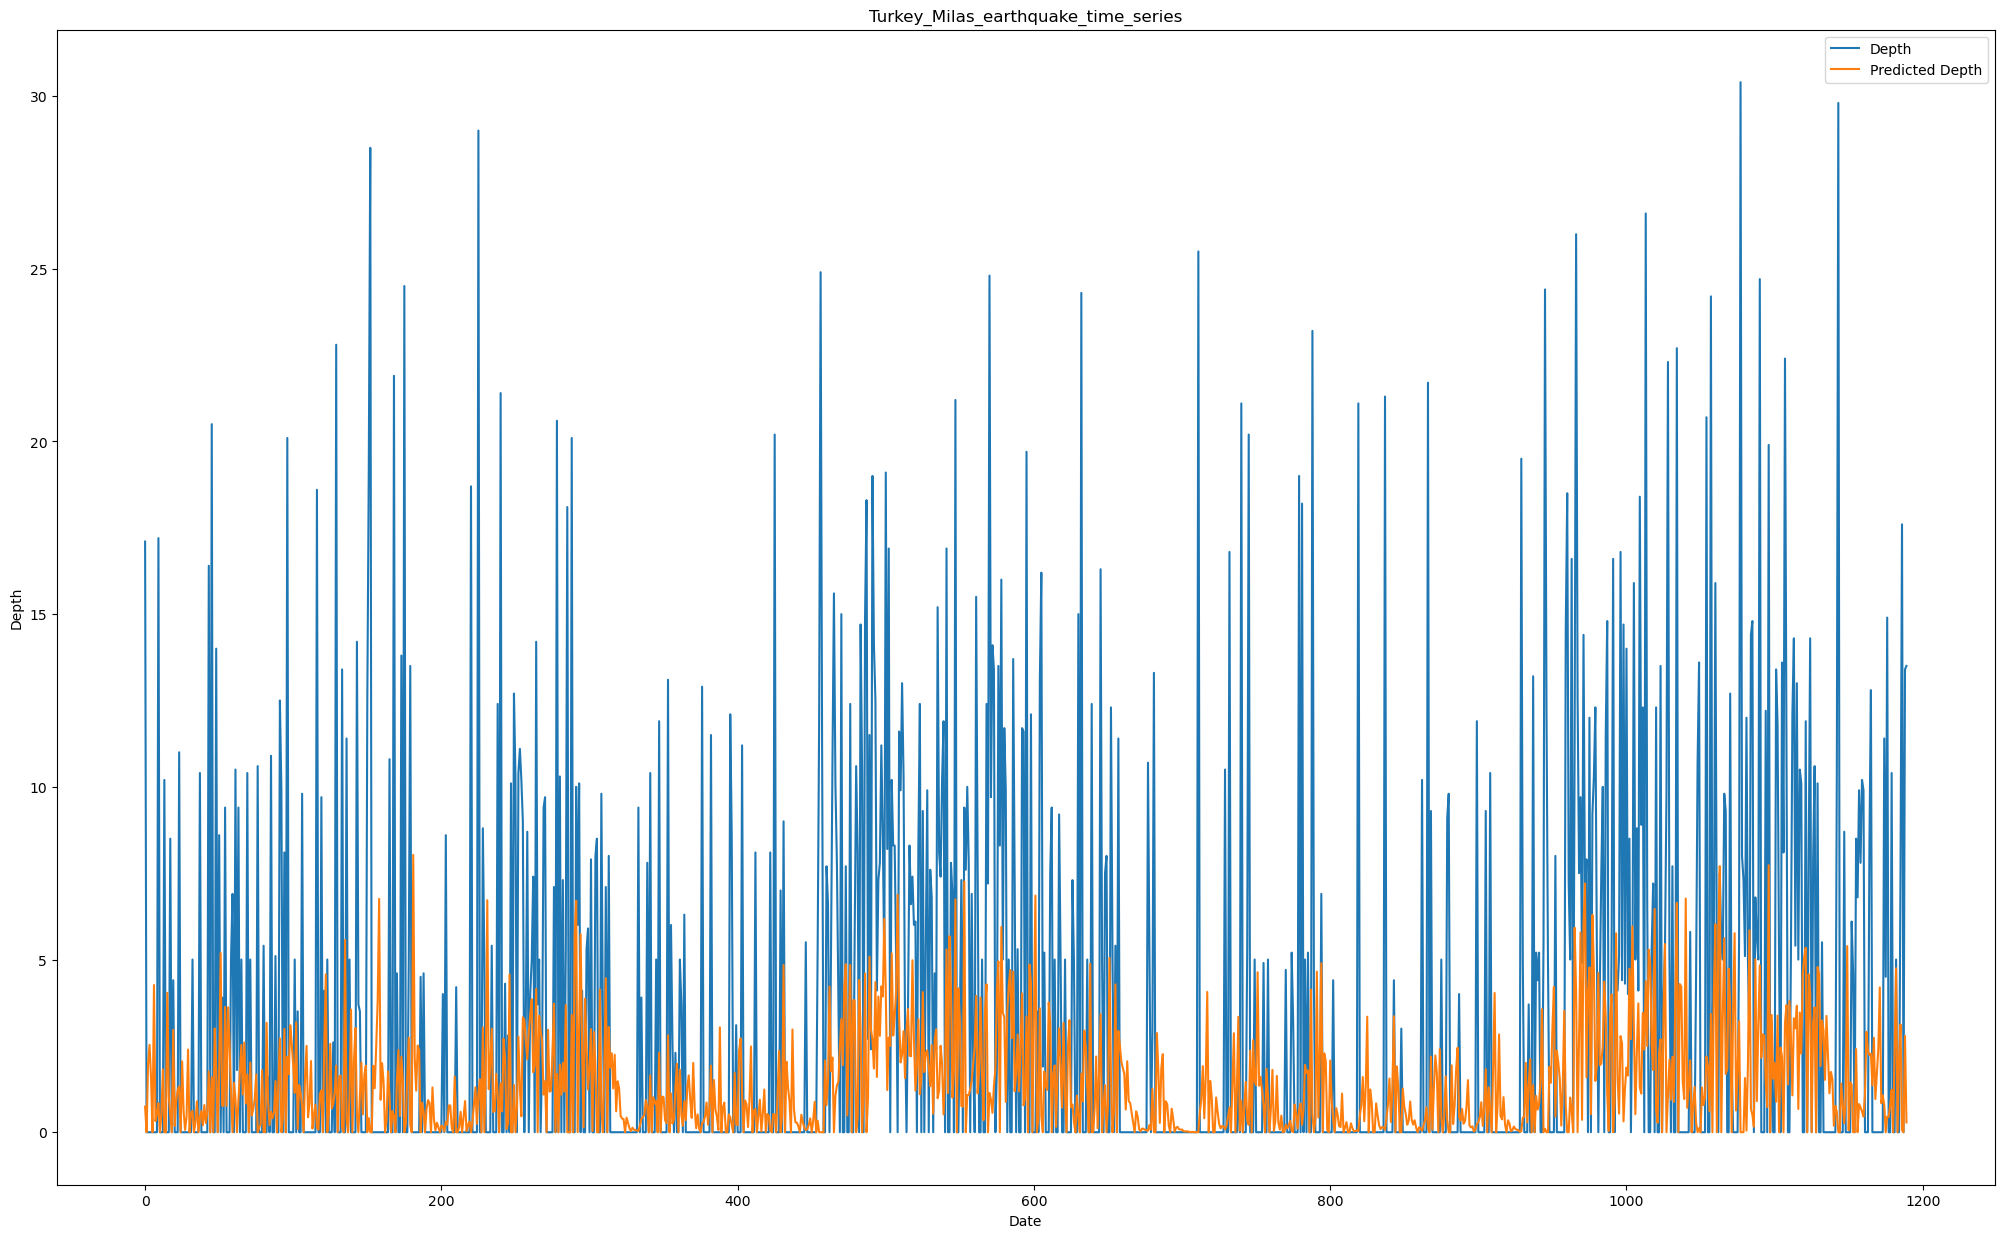

In [138]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Milas_earthquake_time_series')
xlabel('Date')
ylabel('Depth')
legend(['Depth','Predicted Depth'])
show()